# Unit 5 - Financial Planning

In [58]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from MCForecastTools import MCSimulation
import pprint

%matplotlib inline

In [59]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [60]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [61]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# from fastquant import get_crypto_data
# importing BTC info
response = requests.get(btc_url)

# Printing out dictionary to find 'price' data point
d = response.json()
pprint.pprint(d)

# Printing BTC price from dictionary
BTC_Price = d['data']['1']['quotes']['USD']['price']
BTC_Price

{'data': {'1': {'circulating_supply': 18988037,
                'id': 1,
                'last_updated': 1647721085,
                'max_supply': 21000000,
                'name': 'Bitcoin',
                'quotes': {'USD': {'market_cap': 798209247042,
                                   'percent_change_1h': -0.0742879331523067,
                                   'percent_change_24h': 0.0882545066038913,
                                   'percent_change_7d': 8.2521521196838,
                                   'percentage_change_1h': -0.0742879331523067,
                                   'percentage_change_24h': 0.0882545066038913,
                                   'percentage_change_7d': 8.2521521196838,
                                   'price': 41975.0,
                                   'volume_24h': 47270524859}},
                'rank': 1,
                'symbol': 'BTC',
                'total_supply': 18988037,
                'website_slug': 'bitcoin'}},
 'metadata': {'err

41975.0

In [62]:
# Fetch current BTC price
# See above

# Fetch current ETH price
response1 = requests.get(eth_url)
d1 = response1.json()
ETH_Price = d1['data']['1027']['quotes']['USD']['price']
ETH_Price 

# Compute current value of my crpto
my_btc_value = BTC_Price * my_btc
my_eth_value = ETH_Price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50370.00
The current value of your 5.3 ETH is $15604.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [63]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [64]:
# Set Alpaca API key and secret
load_dotenv()
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_secret = os.getenv('ALPACA_SECRET_KEY')

#alpaca_key

# Create the Alpaca API object

api = REST(key_id = alpaca_key, secret_key = alpaca_secret)
api.get_bars("SPY", TimeFrame(1, TimeFrameUnit.Day), "2020-06-08", "2022-03-18", adjustment='raw').df


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-06-08 04:00:00+00:00,320.300,323.4100,319.6300,323.15,73646235,402339,321.437815
2020-06-09 04:00:00+00:00,320.260,323.2849,319.3600,320.94,77479917,403505,321.187322
2020-06-10 04:00:00+00:00,321.510,322.3900,318.2209,319.03,95001290,548930,320.115226
2020-06-11 04:00:00+00:00,311.310,312.1500,300.0100,300.69,209243670,1214588,305.773340
2020-06-12 04:00:00+00:00,308.320,309.0800,298.6000,304.38,194681379,1164188,303.422848
...,...,...,...,...,...,...,...
2022-03-14 04:00:00+00:00,420.975,424.5500,415.7900,417.00,91930409,863515,419.203845
2022-03-15 04:00:00+00:00,419.900,426.8400,418.4200,426.17,104219651,920659,422.752423
2022-03-16 04:00:00+00:00,429.940,435.6800,424.8000,435.62,138130298,1344164,431.339744


In [86]:
# Format current date as ISO format
import datetime
DT = datetime.datetime.now().isoformat()
print(DT)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
#barset = api.get_barset("AGG", "day", limit=1000)
#aag_bars = barset['AAG']
#print(aag_bars)

# Preview DataFrame
# YOUR CODE HERE!

api = REST(key_id = alpaca_key, secret_key = alpaca_secret)
AGG_df = api.get_bars('AGG', TimeFrame(1, TimeFrameUnit.Day), "2022-03-18", "2022-03-18", adjustment='raw').df
SPY_df = api.get_bars('SPY', TimeFrame(1, TimeFrameUnit.Day), "2022-03-18", "2022-03-18", adjustment='raw').df

AGG_df = AGG_df.filter(['close'])
SPY_df = SPY_df.filter(['close'])

df = pd.concat([AGG_df, SPY_df], axis='columns')

df.head()

2022-03-19T16:50:47.991228


,close,close
timestamp,,
2022-03-18 04:00:00+00:00,108.1,444.52


In [66]:
#Adding AGG and SPY to header
AGG_df.columns = pd.MultiIndex.from_product([['AGG'], AGG_df.columns])
SPY_df.columns = pd.MultiIndex.from_product([['SPY'], SPY_df.columns])
df1 = pd.concat([AGG_df, SPY_df], axis=1)
df1

,AGG,SPY
,close,close
timestamp,,
2022-03-18 04:00:00+00:00,108.1,444.52


In [68]:
# Pick AGG and SPY close prices
agg_close_price = float(df1['AGG']['close'])
spy_close_price = float(df1['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.1
Current SPY closing price: $444.52


In [69]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [79]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_assets = my_spy_value + my_agg_value + my_btc_value + my_eth_value
total_assets 
# Create savings DataFrame
df2 = {'value': [my_spy_value, my_btc_value, my_agg_value, my_eth_value]}
df_savings = pd.DataFrame(data=df2)
df_savings.index=['SPY', 'AGG', 'BTC', 'ETH']
print(df_savings)
# Display savings DataFrame
#display(df_savings)

         value
SPY  22226.000
AGG  50370.000
BTC  21620.000
ETH  15604.631


<AxesSubplot:ylabel='value'>

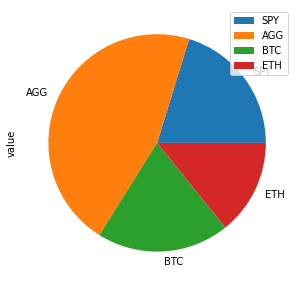

In [84]:
# Plot savings pie chart
df3 = pd.DataFrame(df_savings)
plot = df3.plot.pie(y='value', figsize=(5, 5))
plot

In [85]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
total_assets

# Validate saving health
saving_health = total_assets / monthly_income
print(f"I have a total savings of {saving_health} months of income, which is ${monthly_income}.")

I have a total savings of 9.15171925 months of income, which is $12000.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

AGG_df_1 = api.get_bars('AGG', TimeFrame(1, TimeFrameUnit.Day), "2018-03-18", "2022-03-18", adjustment='raw').df
SPY_df_1 = api.get_bars('SPY', TimeFrame(1, TimeFrameUnit.Day), "2018-03-18", "2022-03-18", adjustment='raw').df
AGG_df_1.drop(columns=['trade_count', 'vwap'], inplace=True)
SPY_df_1.drop(columns=['trade_count', 'vwap'], inplace=True)

AGG_df_1.columns = pd.MultiIndex.from_product([['AGG_df_1'], AGG_df_1.columns])
SPY_df_1.columns = pd.MultiIndex.from_product([['SPY_df_1'], SPY_df_1.columns])
df_stock_data = pd.concat([AGG_df_1, SPY_df_1], axis=1)

# df_stock_data = pd.concat([AGG_df_1, SPY_df_1], axis=1, keys=(list('AAGSPY')))

# Display sample data
#df_stock_data.drop(columns=['trade_count'], inplace=True)
df_stock_data.head()

AGG_df_1                                  SPY_df_1  \
                              open    high     low   close   volume     open   
timestamp                                                                      
2018-03-19 04:00:00+00:00   106.56  106.74  106.53  106.59  2263306   273.34   
2018-03-20 04:00:00+00:00   106.44  106.51  106.40  106.42  3000759   270.91   
2018-03-21 04:00:00+00:00   106.32  106.48  106.08  106.41  2994423   270.88   
2018-03-22 04:00:00+00:00   106.67  106.80  106.49  106.61  3334408   267.83   
2018-03-23 04:00:00+00:00   106.46  106.70  106.46  106.61  3618720   264.17   

                                                                 
                               high     low    close     volume  
timestamp                                                        
2018-03-19 04:00:00+00:00  274.3957  268.62  270.610  109335542  
2018-03-20 04:00:00+00:00  271.6700  270.18  270.930   60267376  
2018-03-21 04:00:00+00:00  273.2700  270.19  270.400   78884438  
2018-03-22 04:00:00+00:00  268.8700  263.36  263.710  149493729  
2018-03-23 04:00:00+00:00  265.0200  257.83  258.015  183856351

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Went with 50/50 portfolio split instead of using exact share and price amounts as I'm not sure how to do that
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5, .5],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG_df_1                                   \
                              open    high     low   close   volume   
timestamp                                                             
2018-03-19 04:00:00+00:00   106.56  106.74  106.53  106.59  2263306   
2018-03-20 04:00:00+00:00   106.44  106.51  106.40  106.42  3000759   
2018-03-21 04:00:00+00:00   106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00   106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00   106.46  106.70  106.46  106.61  3618720   

                                       SPY_df_1                             \
                          daily_return     open      high     low    close   
timestamp                                                                    
2018-03-19 04:00:00+00:00          NaN   273.34  274.3957  268.62  270.610   
2018-03-20 04:00:00+00:00    -0.001595   270.91  271.6700  270.18  270.930   
2018-03-21 04:00:00+00:00    -0.000094   270.88  273.2700  270.19  270.400   
2018-03-22 04:00:00+00:00     0.001880   267.83  268.8700  263.36  263.710   
2018-03-23 04:00:00+00:00     0.000000   264.17  265.0200  257.83  258.015   

                                                   
                              volume daily_return  
timestamp                                          
2018-03-19 04:00:00+00:00  109335542          NaN  
2018-03-20 04:00:00+00:00   60267376     0.001183  
2018-03-21 04:00:00+00:00   78884438    -0.001956  
2018-03-22 04:00:00+00:00  149493729    -0.024741  
2018-03-23 04:00:00+00:00  183856351    -0.021596

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999971,1.009749,0.993638,0.996099,0.998356,1.007053,1.003805,0.993054,0.994087,1.000990,...,1.002515,0.999713,1.001304,1.007928,1.006669,1.012643,0.987747,1.002277,1.000312,1.008518
2,0.987289,1.009325,0.993718,0.990321,0.997870,1.018764,1.004140,0.996922,0.997955,1.008029,...,1.004875,0.994723,1.000016,1.005984,0.999516,1.024564,0.993351,0.995478,0.992334,0.995365
3,0.992145,0.996739,1.010346,0.992317,0.997450,1.005297,0.996225,1.010609,1.000213,1.013569,...,1.000751,1.004313,0.996914,1.013529,0.994054,1.024220,1.005735,0.990855,0.984821,0.991878
4,0.997258,0.997265,1.006443,0.986677,0.994657,1.010848,1.003669,1.013528,0.997623,1.013720,...,1.006137,0.997965,0.990334,1.010858,0.996394,1.021960,1.011473,0.982226,0.985454,0.989529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.031576,6.905887,28.513911,10.973522,6.657427,3.335449,9.644885,4.191711,6.289110,12.462933,...,5.556652,24.202355,6.935530,8.090798,17.347626,4.250135,10.423250,5.616948,5.437069,9.331752
7557,4.046042,6.948468,28.404386,11.048005,6.708855,3.289884,9.717258,4.163216,6.242314,12.502839,...,5.499799,24.107460,6.947033,8.124287,17.274079,4.287072,10.459650,5.631502,5.396901,9.348400
7558,4.072117,7.017191,28.151631,11.113731,6.693489,3.295477,9.737441,4.168107,6.225919,12.536702,...,5.457389,24.105119,6.938938,8.132883,17.279571,4.303378,10.446583,5.626975,5.365732,9.320708
7559,4.061541,7.072094,28.126162,11.183477,6.707994,3.309402,9.708206,4.168475,6.273032,12.545686,...,5.530271,24.242739,6.949891,8.141949,17.049356,4.284174,10.581008,5.616664,5.387904,9.439538


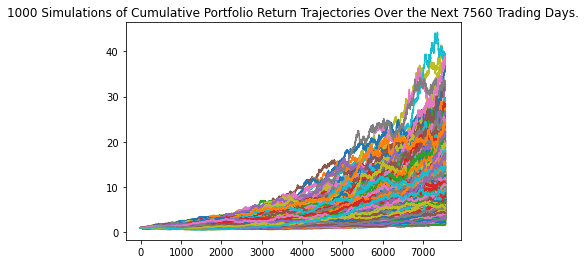

In [24]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

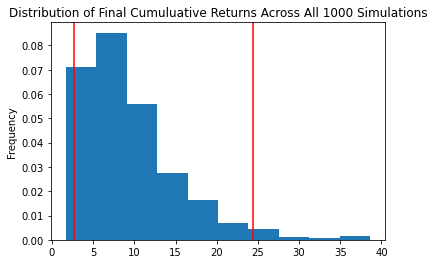

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               9.431945
std                5.796816
min                1.673926
25%                5.190151
50%                7.995105
75%               12.041462
max               38.628893
95% CI Lower       2.639779
95% CI Upper      24.368977
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8]*20000,2)
even_ci_upper = round(even_tbl[9]*20000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52795.59 and $487379.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*(initial_investment),2)
ci_upper = round(even_tbl[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $79193.38 and $731069.3


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5, .5],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_even_dist_5.portfolio_data.head()

AGG_df_1                                   \
                              open    high     low   close   volume   
timestamp                                                             
2018-03-19 04:00:00+00:00   106.56  106.74  106.53  106.59  2263306   
2018-03-20 04:00:00+00:00   106.44  106.51  106.40  106.42  3000759   
2018-03-21 04:00:00+00:00   106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00   106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00   106.46  106.70  106.46  106.61  3618720   

                                       SPY_df_1                             \
                          daily_return     open      high     low    close   
timestamp                                                                    
2018-03-19 04:00:00+00:00          NaN   273.34  274.3957  268.62  270.610   
2018-03-20 04:00:00+00:00    -0.001595   270.91  271.6700  270.18  270.930   
2018-03-21 04:00:00+00:00    -0.000094   270.88  273.2700  270.19  270.400   
2018-03-22 04:00:00+00:00     0.001880   267.83  268.8700  263.36  263.710   
2018-03-23 04:00:00+00:00     0.000000   264.17  265.0200  257.83  258.015   

                                                   
                              volume daily_return  
timestamp                                          
2018-03-19 04:00:00+00:00  109335542          NaN  
2018-03-20 04:00:00+00:00   60267376     0.001183  
2018-03-21 04:00:00+00:00   78884438    -0.001956  
2018-03-22 04:00:00+00:00  149493729    -0.024741  
2018-03-23 04:00:00+00:00  183856351    -0.021596

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005932,1.005717,0.991038,1.002006,1.003249,0.998885,1.009224,0.996954,1.004435,1.001814,...,0.996549,1.008252,1.001289,1.009354,1.003707,1.002442,1.007179,0.996458,1.011366,1.007296
2,1.005018,1.005740,0.989595,0.998901,1.009335,1.002576,1.012931,1.000638,1.019321,0.987245,...,0.993272,1.009274,1.004511,1.009809,1.005858,0.990000,1.000180,0.991445,1.004615,1.012597
3,1.016082,1.003463,0.984464,1.004995,1.004504,1.000668,1.019029,1.009359,1.015914,0.980620,...,0.989399,1.007007,0.996573,1.010058,1.008635,0.987530,0.988869,0.989487,1.004811,1.012047
4,1.010576,1.006003,0.976446,1.010867,1.001751,0.999698,1.016755,1.015448,1.018136,0.979147,...,0.993736,0.996855,0.988944,1.011314,1.000637,1.000448,0.996922,0.997609,1.010627,1.011877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.967948,1.714086,1.242144,1.582125,0.971548,1.310626,0.791677,1.660951,1.848767,1.089697,...,0.926293,1.769353,0.796315,1.021923,1.195444,1.564902,1.379951,1.786724,1.756227,1.556090
1257,1.977194,1.739735,1.255265,1.588595,0.958883,1.306815,0.798528,1.666477,1.845504,1.094723,...,0.925419,1.743700,0.787590,1.018729,1.189222,1.568223,1.366102,1.786220,1.735597,1.568782
1258,1.976699,1.725209,1.261512,1.589845,0.960185,1.305694,0.793517,1.642045,1.844484,1.092294,...,0.915765,1.717687,0.796415,1.016179,1.209532,1.550879,1.350214,1.787431,1.726524,1.569174
1259,1.969028,1.715619,1.259957,1.593407,0.960223,1.294384,0.798053,1.656152,1.849456,1.086312,...,0.911652,1.727558,0.797369,1.003161,1.213716,1.551023,1.344570,1.762096,1.731759,1.556187


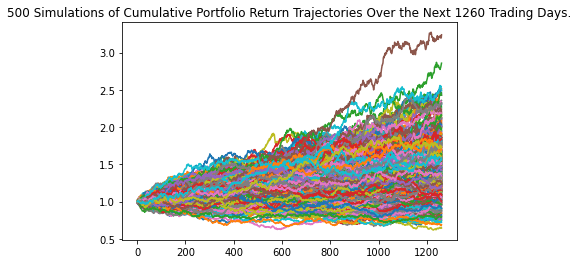

In [34]:
# Plot simulation outcomes
line_plot = MC_even_dist_5.plot_simulation()

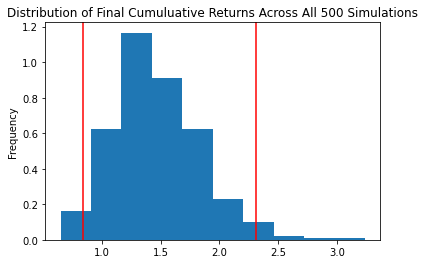

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist_5.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5 = MC_even_dist_5.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5)

count           500.000000
mean              1.464435
std               0.370454
min               0.648226
25%               1.213463
50%               1.417430
75%               1.690607
max               3.238932
95% CI Lower      0.840464
95% CI Upper      2.310772
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment_5 = 1000000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(even_tbl[8]*(initial_investment),2)
ci_upper_5 = round(even_tbl[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $1000000 in the portfolio over the next 5 years will end within in the range of $79193.38 and $731069.3


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5, .5],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_even_dist_10.portfolio_data.head()

AGG_df_1                                   \
                              open    high     low   close   volume   
timestamp                                                             
2018-03-19 04:00:00+00:00   106.56  106.74  106.53  106.59  2263306   
2018-03-20 04:00:00+00:00   106.44  106.51  106.40  106.42  3000759   
2018-03-21 04:00:00+00:00   106.32  106.48  106.08  106.41  2994423   
2018-03-22 04:00:00+00:00   106.67  106.80  106.49  106.61  3334408   
2018-03-23 04:00:00+00:00   106.46  106.70  106.46  106.61  3618720   

                                       SPY_df_1                             \
                          daily_return     open      high     low    close   
timestamp                                                                    
2018-03-19 04:00:00+00:00          NaN   273.34  274.3957  268.62  270.610   
2018-03-20 04:00:00+00:00    -0.001595   270.91  271.6700  270.18  270.930   
2018-03-21 04:00:00+00:00    -0.000094   270.88  273.2700  270.19  270.400   
2018-03-22 04:00:00+00:00     0.001880   267.83  268.8700  263.36  263.710   
2018-03-23 04:00:00+00:00     0.000000   264.17  265.0200  257.83  258.015   

                                                   
                              volume daily_return  
timestamp                                          
2018-03-19 04:00:00+00:00  109335542          NaN  
2018-03-20 04:00:00+00:00   60267376     0.001183  
2018-03-21 04:00:00+00:00   78884438    -0.001956  
2018-03-22 04:00:00+00:00  149493729    -0.024741  
2018-03-23 04:00:00+00:00  183856351    -0.021596

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006172,0.999250,0.997237,0.997967,1.005945,0.996468,0.991749,1.007934,1.003768,0.999696,...,0.992517,1.006170,0.996079,1.004268,0.989878,0.995840,1.011399,1.006743,1.006636,1.002466
2,1.009541,1.004310,0.993209,0.997623,0.991269,0.990712,0.989599,1.000187,1.001864,0.988074,...,0.993693,1.006250,0.997469,1.000695,0.989904,0.987345,0.999797,1.000936,1.018688,0.995546
3,1.006795,1.003738,0.990723,1.002114,0.991328,0.985057,0.973898,1.002432,0.998823,0.976857,...,1.000931,1.000990,1.008502,0.998777,0.987454,0.985186,0.998322,0.996863,1.021159,1.002039
4,1.014031,1.006785,0.985306,1.014762,0.986213,0.984048,0.979039,0.998819,1.000478,0.965693,...,1.008302,0.995817,0.994531,1.011371,0.984576,0.978798,0.995121,1.003023,1.028945,1.005476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.627147,1.717977,1.645366,1.900991,1.367073,3.413229,1.097765,2.535794,1.288805,3.046948,...,2.820668,2.036386,2.775239,1.940871,2.195576,3.058550,1.344984,2.520929,4.570700,1.469719
2517,1.622444,1.735563,1.643213,1.894336,1.369214,3.435289,1.101032,2.560742,1.295845,3.023761,...,2.837327,2.029475,2.782157,1.934788,2.195189,3.080101,1.345151,2.522553,4.541104,1.457788
2518,1.627616,1.723021,1.643416,1.901254,1.376267,3.455047,1.104084,2.537960,1.312329,3.014122,...,2.820782,2.050011,2.797335,1.941881,2.211230,3.066470,1.340231,2.521013,4.555525,1.469636
2519,1.622995,1.748706,1.642158,1.880078,1.373119,3.496874,1.104472,2.550115,1.322492,2.976498,...,2.829159,2.065599,2.764703,1.917045,2.199939,3.062911,1.348637,2.527174,4.548210,1.471992


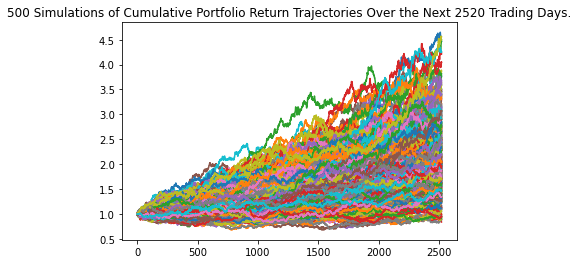

In [40]:
# Plot simulation outcomes
line_plot = MC_even_dist_10.plot_simulation()

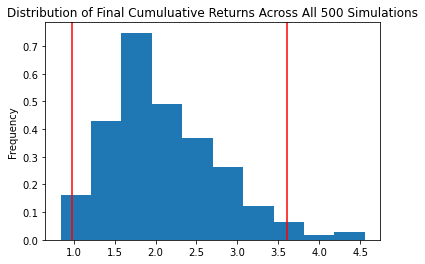

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist_10.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10 = MC_even_dist_10.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10)


count           500.000000
mean              2.087851
std               0.672168
min               0.840500
25%               1.632300
50%               1.966056
75%               2.484994
max               4.555707
95% CI Lower      0.982433
95% CI Upper      3.601269
Name: 2520, dtype: float64


In [43]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(even_tbl[8]*(initial_investment),2)
ci_upper_10 = round(even_tbl[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $79193.38 and $731069.3
